In [9]:
from tabpfn.scripts.transformer_prediction_interface import TabPFNClassifier
from tabpfn.scripts.transformer_prediction_interface import transformer_predict
import numpy as np
from sklearn.metrics import accuracy_score


model = TabPFNClassifier()

module = model.model[2]
# import train test split
from sklearn.model_selection import train_test_split

import torch

Using style prior: True
{'recompute_attn': True}
<module 'wandb' from '/home/parietal/lgrinszt/.local/miniconda3/envs/tab_pfn2/lib/python3.9/site-packages/wandb/__init__.py'>
Using cpu device
Batch size: 1
Using distributed training: False
Using a Transformer with 25.82 M parameters


# Toy example

In [33]:
# Create fake datasets
# Create a first dataset with columns A, B
torch.manual_seed(42)
dataset1 = torch.rand(1000, 1, 100)
# Create a second dataset with columns C, D
dataset2 = torch.rand(1000, 1, 100)

# Make column C equal to column A * 2 + noise
dataset2[:, :, 0] = dataset1[:, :, 0] #+ torch.rand(1000, 1) * 0.1

# Create y as D + noise
y = dataset2[:, :, 1]# + dataset1[:, :, 4] #+ torch.rand(1000, 1) * 0.1

#dataset2.requires_grad = True
#dataset1.requires_grad = True

# Make it a classification problem
y = (y > np.median(y)).float()

print(np.unique(y, return_counts=True))

# Shuffle the rows of dataset2
dataset2 = dataset2[torch.randperm(dataset2.size()[0])]

(array([0., 1.], dtype=float32), array([500, 500]))


In [34]:
# import multihead attention
from torch.nn import MultiheadAttention
n = 512
attention = MultiheadAttention(embed_dim=n, num_heads=1, dropout=0.0)
W_q = torch.rand(n, n)
W_k = torch.rand(n, n)
W_v = torch.rand(n, n)
W_q.requires_grad = True
W_k.requires_grad = True
W_v.requires_grad = True

# Q = torch.matmul(dataset1, W_q)
# K = torch.matmul(dataset2, W_k)
# V = torch.matmul(dataset2, W_v)

# Transform dataset1 by applying the attention to dataset2
#dataset1 = attention(Q, K, V)[0]


In [35]:
# Try with random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()

# Train is the first 200 rows of dataset1
X_train = dataset1[:200].reshape(200, -1)
# Test is the last 200 rows of dataset1
X_test = dataset1[200:].reshape(800, -1)
print(X_train.shape)
print(X_test.shape)

# Train is the first 200 rows of dataset2
X_train2 = dataset2[:200].reshape(200, -1)
# Test is the last 200 rows of dataset2
X_test2 = dataset2[200:].reshape(800, -1)

# Train is the first 200 rows of y
y_train = y[:200].reshape(200)

# Test is the last 200 rows of y
y_test = y[200:].reshape(800)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Calculate accuracy
print(accuracy_score(y_test, y_pred))

# Train the model
rf.fit(X_train2, y_train)

# Predict on the test set
y_pred = rf.predict(X_test2)

# Calculate accuracy
print(accuracy_score(y_test, y_pred))



torch.Size([200, 100])
torch.Size([800, 100])
0.49
0.485


In [36]:

y_pred = torch.argmax(module((dataset2, y), single_eval_pos=200, x_already_encoded=False), dim=-1).reshape(-1)
print(y_pred)
print(y_pred.shape)
# Check the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y[-len(y_pred):], y_pred))

tensor([0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
        0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
        1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
        0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
        1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
        1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
        1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,

In [37]:

# require grad
#input.requires_grad = True
#input2.requires_grad = True

In [38]:
train_size = 200
val_size = 400
test_size = 400

assert train_size + val_size + test_size == len(dataset1)

In [39]:
# optimize the attention matrix W_q, W_k, W_v
# TODO: do this after the decoding step
from torch import optim
optimizer = optim.Adam([W_q, W_k, W_v], lr=0.001)
for i in range(100):
    optimizer.zero_grad()
    input = model.model[2].encoder(dataset1)
    input2 = model.model[2].encoder(dataset2)
    Q = torch.matmul(input, W_q)
    K = torch.matmul(input2, W_k)
    V = torch.matmul(input2, W_v)
    full_input = input + attention(Q, K, V)[0]
    #TODO model which can take the encoded input and the encoded output
    y_pred = module((full_input, y), single_eval_pos=train_size, x_already_encoded=True).squeeze()
    loss = torch.nn.functional.cross_entropy(y_pred[:val_size], y[-len(y_pred):-len(y_pred) + val_size].squeeze().long())
    loss.backward()
    optimizer.step()
    print(loss)
    if i % 10 == 0:
        y_pred = torch.argmax(y_pred, dim=-1).reshape(-1)
        print("Test accuracy: ")
        print(accuracy_score(y[-len(y_pred) + val_size:], y_pred[val_size:]))
        print("Val accuracy: ")
        print(accuracy_score(y[-len(y_pred): -len(y_pred) + val_size], y_pred[:val_size]))

tensor(0.6909, grad_fn=<NllLossBackward>)
Test accuracy: 
0.4975
Val accuracy: 
0.5325
tensor(0.7050, grad_fn=<NllLossBackward>)
tensor(0.7061, grad_fn=<NllLossBackward>)
tensor(0.6985, grad_fn=<NllLossBackward>)
tensor(0.6958, grad_fn=<NllLossBackward>)
tensor(0.6933, grad_fn=<NllLossBackward>)
tensor(0.6885, grad_fn=<NllLossBackward>)
tensor(0.6875, grad_fn=<NllLossBackward>)
tensor(0.6841, grad_fn=<NllLossBackward>)
tensor(0.6763, grad_fn=<NllLossBackward>)
tensor(0.6713, grad_fn=<NllLossBackward>)
Test accuracy: 
0.5
Val accuracy: 
0.575
tensor(0.6615, grad_fn=<NllLossBackward>)
tensor(0.6497, grad_fn=<NllLossBackward>)
tensor(0.6365, grad_fn=<NllLossBackward>)
tensor(0.6229, grad_fn=<NllLossBackward>)
tensor(0.6122, grad_fn=<NllLossBackward>)
tensor(0.6515, grad_fn=<NllLossBackward>)
tensor(0.6094, grad_fn=<NllLossBackward>)
tensor(0.6071, grad_fn=<NllLossBackward>)
tensor(0.6070, grad_fn=<NllLossBackward>)
tensor(0.5962, grad_fn=<NllLossBackward>)
Test accuracy: 
0.485
Val accura

In [40]:
# from tabpfn.transformer_2 import TransformerModel2
# from tabpfn.scripts.transformer_prediction_interface import TabPFNClassifier

# model = TabPFNClassifier()
# module = model.model[2]
# config = model.c

# model_torch = TransformerModel2(nhead=config["nhead"], nlayers=config["nlayers"],
#                                 encoder=module.encoder, y_encoder=module.y_encoder,
#                                 n_out=module.n_out, ninp=module.ninp, nhid=module.nhid,
#                                 efficient_eval_masking=module.efficient_eval_masking,
#                                 full_attention=module.full_attention)
# # Transfer the weights
# weights_to_transfer = model.model[2].state_dict()
# weights_to_transfer.pop("criterion.weight")
# model_torch.load_state_dict(weights_to_transfer)


In [41]:
input = model.model[2].encoder(dataset1)
input2 = model.model[2].encoder(dataset2)
y_pred = torch.argmax(module((full_input, y), single_eval_pos=200, x_already_encoded=True), dim=-1).reshape(-1)
# Check the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y[-len(y_pred):].reshape(-1), y_pred))

0.7175


In [ ]:
y[-len(y_pred):].shape

torch.Size([200, 1])

# Real data

In [ ]:
device = "cuda:0"
model = TabPFNClassifier(device=device)

module = model.model[2]

Using style prior: True
{'recompute_attn': True}
<module 'wandb' from '/home/parietal/lgrinszt/.local/miniconda3/envs/tab_pfn2/lib/python3.9/site-packages/wandb/__init__.py'>
Using cuda:0 device
Batch size: 1
Using distributed training: False
Using a Transformer with 25.82 M parameters


## California

In [ ]:
# Try the same thing on the california housing dataset
from sklearn.datasets import fetch_california_housing
import pandas as pd

data = fetch_california_housing(as_frame=True)

In [ ]:
df_california = data["frame"]
# drop the target
df_california = df_california.drop("MedHouseVal", axis=1)
# drop income
df_california_without_income = df_california.drop("MedInc", axis=1)
# Drop more columns to make it harder
# df_california = df_california.drop("AveOccup", axis=1)
# df_california_without_income = df_california_without_income.drop("AveOccup", axis=1)
# only keep Latitude and Longitude
df_california = df_california[["MedInc", "Latitude", "Longitude"]]
df_california_without_income = df_california_without_income[["Latitude", "Longitude"]]
target = data["target"]

In [ ]:
df_california

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25
...,...,...,...
20635,1.5603,39.48,-121.09
20636,2.5568,39.49,-121.21
20637,1.7000,39.43,-121.22
20638,1.8672,39.43,-121.32


In [ ]:
data = {'City': ['Los Angeles', 'San Diego', 'San Jose', 'San Francisco', 'Fresno', 'Sacramento', 'Long Beach', 'Oakland', 'Bakersfield', 'Anaheim', 'Santa Ana', 'Riverside', 'Stockton', 'Chula Vista', 'Irvine', 'Fremont', 'San Bernardino', 'Modesto', 'Fontana', 'Oxnard'], 
        'Average Household Income': ['$101,006', '$113,681', '$150,601', '$167,663', '$73,396', '$87,213', '$89,912', '$116,585', '$84,592', '$97,136', '$88,829', '$90,520', '$78,712', '$105,155', '$140,764', '$170,083', '$64,929', '$81,841', '$93,383', '$91,636']}

df_cities = pd.DataFrame(data)

In [ ]:
# Get lat and long for each city
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my-application (leo.grinsztajn@gmail.com)")
df_cities["location"] = df_cities["City"].apply(lambda x: geolocator.geocode(x))
df_cities["latitude"] = df_cities["location"].apply(lambda x: x.latitude)
df_cities["longitude"] = df_cities["location"].apply(lambda x: x.longitude)


In [ ]:
df_cities

,City,Average Household Income,location,latitude,longitude
0,Los Angeles,101006,"(Los Angeles, Los Angeles County, CAL Fire Con...",34.053691,-118.242766
1,San Diego,113681,"(San Diego, San Diego County, CAL Fire Souther...",32.717420,-117.162773
2,San Jose,150601,"(San Jose, Santa Clara County, CAL Fire Northe...",37.336166,-121.890591
3,San Francisco,167663,"(San Francisco, CAL Fire Northern Region, Cali...",37.779026,-122.419906
4,Fresno,73396,"(Fresno, Fresno County, CAL Fire Southern Regi...",36.739442,-119.784831
5,Sacramento,87213,"(Sacramento, Sacramento County, CAL Fire North...",38.581061,-121.493895
6,Long Beach,89912,"(Long Beach, Los Angeles County, CAL Fire Cont...",33.769016,-118.191604
7,Oakland,116585,"(Oakland, Alameda County, CAL Fire Northern Re...",37.804456,-122.271356
8,Bakersfield,84592,"(Bakersfield, Kern County, CAL Fire Southern R...",35.373871,-119.019464
9,Anaheim,97136,"(Anaheim, Orange County, CAL Fire Contract Cou...",33.834752,-117.911732


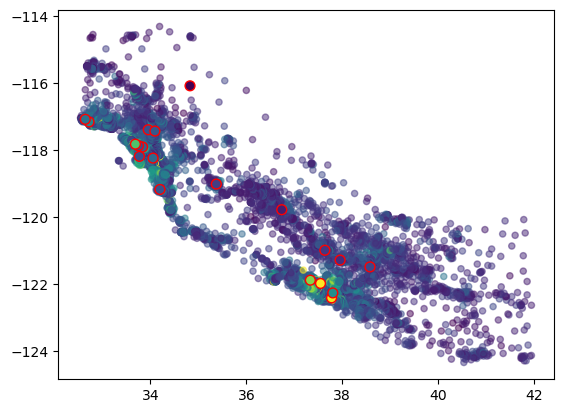

In [ ]:
# Plot the data
import matplotlib.pyplot as plt

plt.scatter(df_california["Latitude"], df_california["Longitude"], c=df_california["MedInc"], s=20, alpha=0.5)
# color border in red
plt.scatter(df_cities["latitude"], df_cities["longitude"], c=df_cities["Average Household Income"], s=50, edgecolors="red")

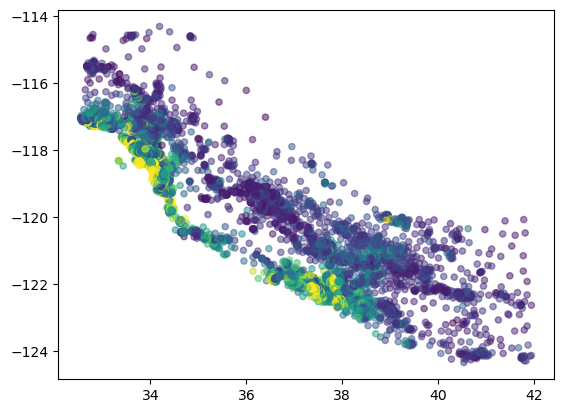

In [ ]:
# Plot the data
import matplotlib.pyplot as plt

plt.scatter(df_california["Latitude"], df_california["Longitude"], c=target, s=20, alpha=0.5)
# color border in red
#plt.scatter(df_cities["latitude"], df_cities["longitude"], c=df_cities["Average Household Income"], s=50, edgecolors="red")

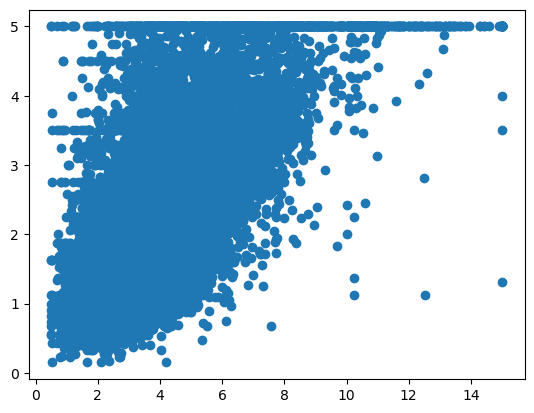

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df_california["MedInc"], target)

### Baselines

In [ ]:
# Convert target to a classification problem
target_classif = (target > np.median(target)).astype(int)

# Convert df_california to a torch tensor
california_tensor = torch.tensor(df_california.values).float()
california_without_income_tensor = torch.tensor(df_california_without_income.values).float()
target_tensor = torch.tensor(target_classif.values).float()

# Suffle the data
from sklearn.utils import shuffle
california_tensor, california_without_income_tensor, target_tensor = shuffle(california_tensor, california_without_income_tensor, target_tensor, random_state=0)

In [ ]:
# Reshape
california_tensor = california_tensor.reshape(california_tensor.shape[0], 1, california_tensor.shape[1])
california_without_income_tensor = california_without_income_tensor.reshape(california_without_income_tensor.shape[0], 1, california_without_income_tensor.shape[1])
target_tensor = target_tensor.reshape(target.shape[0], 1)

In [ ]:
# Truncate the first dim to 5000
california_tensor = california_tensor[:5000]
california_without_income_tensor = california_without_income_tensor[:5000]
target_tensor = target_tensor[:5000]

print(np.unique(target_tensor, return_counts=True))
# print proportion of 1
p = np.unique(target_tensor, return_counts=True)[1][1] / np.unique(target_tensor, return_counts=True)[1].sum()
print(p)
print(1-p)


(array([0., 1.], dtype=float32), array([2549, 2451]))
0.4902
0.5098


In [ ]:
print(california_tensor.shape)
print(california_without_income_tensor.shape)

torch.Size([5000, 1, 3])
torch.Size([5000, 1, 2])


In [ ]:
# Move to GPU
california_tensor = california_tensor.to(device)
california_without_income_tensor = california_without_income_tensor.to(device)
target_tensor = target_tensor.to(device)

In [ ]:
from tabpfn.utils import normalize_data, to_ranking_low_mem, remove_outliers
from tabpfn.priors.utils import normalize_by_used_features_f

normalize_with_test = True #TODO change
#eval_position = 100
normalize_to_ranking = False
max_features=100
normalize_with_sqrt = False

def preprocess_input(eval_xs, eval_ys, categorical_feats, preprocess_transform):
    import warnings

    if eval_xs.shape[1] > 1:
        raise Exception("Transforms only allow one batch dim - TODO")
    if preprocess_transform != 'none':
        if preprocess_transform == 'power' or preprocess_transform == 'power_all':
            pt = PowerTransformer(standardize=True)
        elif preprocess_transform == 'quantile' or preprocess_transform == 'quantile_all':
            pt = QuantileTransformer(output_distribution='normal')
        elif preprocess_transform == 'robust' or preprocess_transform == 'robust_all':
            pt = RobustScaler(unit_variance=True)

    # eval_xs, eval_ys = normalize_data(eval_xs), normalize_data(eval_ys)
    eval_xs = normalize_data(eval_xs, normalize_positions=-1 if normalize_with_test else eval_position)

    # Removing empty features
    eval_xs = eval_xs[:, 0, :]
    sel = [len(torch.unique(eval_xs[0:eval_ys.shape[0], col])) > 1 for col in range(eval_xs.shape[1])]
    eval_xs = eval_xs[:, sel]

    warnings.simplefilter('error')
    if preprocess_transform != 'none':
        eval_xs = eval_xs.cpu().numpy()
        feats = set(range(eval_xs.shape[1])) if 'all' in preprocess_transform else set(
            range(eval_xs.shape[1])) - set(categorical_feats)
        for col in feats:
            try:
                pt.fit(eval_xs[0:eval_position, col:col + 1])
                trans = pt.transform(eval_xs[:, col:col + 1])
                # print(scipy.stats.spearmanr(trans[~np.isnan(eval_xs[:, col:col+1])], eval_xs[:, col:col+1][~np.isnan(eval_xs[:, col:col+1])]))
                eval_xs[:, col:col + 1] = trans
            except:
                pass
        eval_xs = torch.tensor(eval_xs).float()
    warnings.simplefilter('default')

    eval_xs = eval_xs.unsqueeze(1)

    # TODO: Cautian there is information leakage when to_ranking is used, we should not use it
    eval_xs = remove_outliers(eval_xs, normalize_positions=-1 if normalize_with_test else eval_position) if not normalize_to_ranking else normalize_data(to_ranking_low_mem(eval_xs))
    # Rescale X
    eval_xs = normalize_by_used_features_f(eval_xs, eval_xs.shape[-1], max_features,
                                            normalize_with_sqrt=normalize_with_sqrt)

    return eval_xs.detach().to(device)


In [ ]:
#model = TabPFNClassifier(N_ensemble_configurations=1, feature_shift_decoder=False)

#module = model.model[2]
# Pad with 0s until we have 100 features

n_samples, n_features = california_tensor.shape[0], california_tensor.shape[2]
model.fit(california_tensor[:1000].reshape(1000, n_features).cpu(), target_tensor[:1000].reshape(1000).cpu())
y_pred = model.predict(california_tensor[1000:].reshape(4000, n_features).cpu())
print("Accuracy with income")
print(accuracy_score(target_tensor[1000:].reshape(-1).cpu(), y_pred))

n_samples, n_features = california_without_income_tensor.shape[0], california_without_income_tensor.shape[2]
model.fit(california_without_income_tensor[:1000].reshape(1000, n_features).cpu(), target_tensor[:1000].reshape(1000).cpu())
y_pred = model.predict(california_without_income_tensor[1000:].reshape(4000, n_features).cpu())
print("Accuracy without income")
print(accuracy_score(target_tensor[1000:].reshape(-1).cpu(), y_pred))





interface
torch.Size([5000, 1, 3])
torch.Size([5000, 1])
1000
src_mask None
Accuracy with income
0.8215
interface
torch.Size([5000, 1, 2])
torch.Size([5000, 1])
1000
src_mask None
Accuracy without income
0.77825


In [ ]:
# Preprocess the data
from sklearn.preprocessing import StandardScaler, PowerTransformer, QuantileTransformer
#TODO why the difference with random forest?
#scaler = StandardScaler()
#california_tensor_processed = torch.tensor(scaler.fit_transform(california_tensor.reshape(-1, california_tensor.shape[-1])).reshape(california_tensor.shape))
#california_without_income_tensor_processed = torch.tensor(scaler.fit_transform(california_without_income_tensor.reshape(-1, california_without_income_tensor.shape[-1])).reshape(california_without_income_tensor.shape))
print(california_tensor.shape)
california_tensor_processed = preprocess_input(california_tensor, target_tensor, [], preprocess_transform='power')
california_without_income_tensor_processed = preprocess_input(california_without_income_tensor, target_tensor, [], preprocess_transform='power')
# Pad last dimension with 0 to 100
california_tensor_processed = torch.nn.functional.pad(california_tensor_processed, (0, 100-california_tensor.shape[2]))
california_without_income_tensor_processed = torch.nn.functional.pad(california_without_income_tensor_processed, (0, 100-california_without_income_tensor.shape[2]))
print(california_tensor_processed.shape)
# convert to float
california_tensor_processed = california_tensor_processed.float()
y_pred = torch.argmax(module((california_tensor_processed, target_tensor), single_eval_pos=1000, x_already_encoded=False), dim=-1).reshape(-1)
california_without_income_tensor_processed = california_without_income_tensor_processed.float()
y_pred2 = torch.argmax(module((california_without_income_tensor_processed, target_tensor), single_eval_pos=1000, x_already_encoded=False), dim=-1).reshape(-1)
# print shapes
print(y_pred.shape)
print(y_pred2.shape)

from sklearn.metrics import accuracy_score
print("Accuracy with income")
print(accuracy_score(target_tensor[-len(y_pred):].cpu(), y_pred.cpu()))
print("Accuracy without income")
print(accuracy_score(target_tensor[-len(y_pred2):].cpu(), y_pred2.cpu()))

torch.Size([5000, 1, 3])
torch.Size([5000, 1, 100])
src_mask None
src_mask None
torch.Size([4000])
torch.Size([4000])
Accuracy with income
0.822
Accuracy without income
0.783


In [ ]:
# Try with a random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
X, y = california_tensor.reshape(california_tensor.shape[0], -1).cpu().numpy(), target_tensor.reshape(-1).cpu().numpy()
# The train part is the first 1000 samples
rf.fit(X[:1000], y[:1000])
y_pred = rf.predict(X[1000:])
print("Accuracy with income")
print(accuracy_score(y[1000:], y_pred))

# Show most important features
importances = rf.feature_importances_
for i, col in enumerate(df_california.columns):
    print(col)
    print(importances[i])




# without income
rf = RandomForestClassifier()
X, y = california_without_income_tensor.reshape(california_without_income_tensor.shape[0], -1).cpu().numpy(), target_tensor.reshape(-1).cpu().numpy()
# The train part is the first 1000 samples
rf.fit(X[:1000], y[:1000])
y_pred = rf.predict(X[1000:])
print("Accuracy without income")
print(accuracy_score(y[1000:], y_pred))



Accuracy with income
0.847
MedInc
0.40667754638239156
Latitude
0.29151270557073883
Longitude
0.30180974804686955
Accuracy without income
0.83275


### Supervised join

In [ ]:
df_cities

,City,Average Household Income,location,latitude,longitude
0,Los Angeles,"$101,006","(Los Angeles, Los Angeles County, CAL Fire Con...",34.053691,-118.242766
1,San Diego,"$113,681","(San Diego, San Diego County, CAL Fire Souther...",32.717420,-117.162773
2,San Jose,"$150,601","(San Jose, Santa Clara County, CAL Fire Northe...",37.336166,-121.890591
3,San Francisco,"$167,663","(San Francisco, CAL Fire Northern Region, Cali...",37.779026,-122.419906
4,Fresno,"$73,396","(Fresno, Fresno County, CAL Fire Southern Regi...",36.739442,-119.784831
5,Sacramento,"$87,213","(Sacramento, Sacramento County, CAL Fire North...",38.581061,-121.493895
6,Long Beach,"$89,912","(Long Beach, Los Angeles County, CAL Fire Cont...",33.769016,-118.191604
7,Oakland,"$116,585","(Oakland, Alameda County, CAL Fire Northern Re...",37.804456,-122.271356
8,Bakersfield,"$84,592","(Bakersfield, Kern County, CAL Fire Southern R...",35.373871,-119.019464
9,Anaheim,"$97,136","(Anaheim, Orange County, CAL Fire Contract Cou...",33.834752,-117.911732


In [ ]:
#convert value like $101,006' to 101006
df_cities["Average Household Income"] = df_cities["Average Household Income"].apply(lambda x: int(x.replace("$", "").replace(",", "")))


In [ ]:
df_cities.head()

,City,Average Household Income,location,latitude,longitude
0,Los Angeles,101006,"(Los Angeles, Los Angeles County, CAL Fire Con...",34.053691,-118.242766
1,San Diego,113681,"(San Diego, San Diego County, CAL Fire Souther...",32.717420,-117.162773
2,San Jose,150601,"(San Jose, Santa Clara County, CAL Fire Northe...",37.336166,-121.890591
3,San Francisco,167663,"(San Francisco, CAL Fire Northern Region, Cali...",37.779026,-122.419906
4,Fresno,73396,"(Fresno, Fresno County, CAL Fire Southern Regi...",36.739442,-119.784831


In [ ]:
# Convert df_cities to a torch tensor
cities_tensor = torch.tensor(df_cities[["Average Household Income", "latitude", "longitude"]].values).float()
# Reshape
cities_tensor = cities_tensor.reshape(cities_tensor.shape[0], 1, cities_tensor.shape[1])

# preporcess the data
#cities_tensor_processed = preprocess_input(cities_tensor, target_tensor, [], preprocess_transform='power')
#cities_tensor_processed = cities_tensor
# Use a standard scaler
scaler = StandardScaler()
cities_tensor_processed = torch.tensor(scaler.fit_transform(cities_tensor.reshape(-1, cities_tensor.shape[-1])).reshape(cities_tensor.shape))
# convert to float
cities_tensor_processed = cities_tensor_processed.float()

# Pad last dimension with 0 to 100
#TODO: think, do I need to do this or can I just put the vector in the attention?
cities_tensor_processed = torch.nn.functional.pad(cities_tensor_processed, (0, 100-cities_tensor.shape[2]))

In [ ]:
# move to GPU
cities_tensor_processed = cities_tensor_processed.to(device)

In [ ]:
# import multihead attention
from torch.nn import MultiheadAttention
n = 512
attention = MultiheadAttention(embed_dim=n, num_heads=1, dropout=0.0, device=device)
W_q = torch.rand(n, n).to(device)
W_k = torch.rand(n, n).to(device)
W_v = torch.rand(n, n).to(device)
W_q.requires_grad = True
W_k.requires_grad = True
W_v.requires_grad = True


In [ ]:
train_size = 1000
val_size = 2000
test_size = 2000

assert train_size + val_size + test_size == len(california_tensor_processed)

In [ ]:
# Suffle the "Average Household Income" column
cities_tensor_processed_random = cities_tensor_processed[torch.randperm(cities_tensor_processed.shape[0])]

In [ ]:
# optimize the attention matrix W_q, W_k, W_v
#TODO: check if we train on test
from torch import optim
optimizer = optim.Adam([W_q, W_k, W_v], lr=0.01)
for i in range(100):
    optimizer.zero_grad()
    input = model.model[2].encoder(california_without_income_tensor_processed)
    input2 = model.model[2].encoder(cities_tensor_processed)
    Q = torch.matmul(input, W_q)
    K = torch.matmul(input2, W_k)
    V = torch.matmul(input2, W_v)
    print(attention(Q, K, V))
    print(attention(Q, K, V)[0].shape)
    full_input = input + attention(Q, K, V)[0]
    y_pred = module((full_input, target_tensor), single_eval_pos=train_size, x_already_encoded=True).squeeze()
    loss = torch.nn.functional.cross_entropy(y_pred[:val_size], target_tensor[-len(y_pred):-len(y_pred) + val_size].squeeze().long())
    loss.backward()
    optimizer.step()
    print(loss)
    if i % 10 == 0:
        y_pred = torch.argmax(y_pred, dim=-1).reshape(-1)
        print(accuracy_score(target_tensor[-len(y_pred) + val_size:].cpu(), y_pred[val_size:].cpu()))

(tensor([[[-1.0605, -0.4588, -0.4168,  ...,  0.6717,  0.7572, -0.2299]],

        [[-1.0605, -0.4588, -0.4168,  ...,  0.6717,  0.7572, -0.2299]],

        [[ 3.0609,  1.3570,  1.6649,  ..., -0.7751, -0.1080, -0.2386]],

        ...,

        [[-1.0605, -0.4588, -0.4168,  ...,  0.6717,  0.7572, -0.2299]],

        [[ 3.0609,  1.3570,  1.6649,  ..., -0.7751, -0.1080, -0.2386]],

        [[ 3.0609,  1.3570,  1.6649,  ..., -0.7751, -0.1080, -0.2386]]],
       device='cuda:0', grad_fn=<AddBackward0>), tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]], device='cuda:0',
       grad_fn=<DivBackward0>))
torch.Size([5000, 1, 512])
src_mask None
tensor(0.3649, device='cuda:0', grad_fn=<NllLossBackward>)
0.825
(tensor([[[-0.9232, -0.4661, -0.3742,  ...,  0.8973,  0.9715, -0.1752]],

       

In [ ]:
(module.encoder.weight @ W_q) #@ (module.encoder.weight @ W_k)

 ** On entry to SGEMM  parameter number 10 had an illegal value


RuntimeError: CUDA error: CUBLAS_STATUS_INVALID_VALUE when calling `cublasSgemm( handle, opa, opb, m, n, k, &alpha, a, lda, b, ldb, &beta, c, ldc)`

In [ ]:
W_q @ W_k

tensor([[134.6026, 126.2105, 128.5343,  ..., 124.5420, 130.3039, 130.9250],
        [119.1906, 118.4683, 116.1716,  ..., 113.7830, 122.7338, 119.7649],
        [142.0187, 140.4518, 135.3402,  ..., 131.7439, 143.3000, 140.8399],
        ...,
        [138.6850, 134.5296, 134.3990,  ..., 131.4817, 141.6398, 139.1171],
        [122.2724, 125.7378, 124.2800,  ..., 119.3965, 129.3186, 122.1794],
        [121.6797, 115.1022, 117.9574,  ..., 113.7069, 120.4404, 118.2753]],
       device='cuda:0', grad_fn=<MmBackward>)

In [ ]:
module.encoder.weight.data @ W_k

 ** On entry to SGEMM  parameter number 10 had an illegal value


RuntimeError: CUDA error: CUBLAS_STATUS_INVALID_VALUE when calling `cublasSgemm( handle, opa, opb, m, n, k, &alpha, a, lda, b, ldb, &beta, c, ldc)`

In [ ]:
module.encoder.weight.data.shape

torch.Size([512, 100])

In [ ]:
W_k.shape

torch.Size([512, 512])

In [ ]:
((W_q @ module.encoder.weight.data) @ (W_k @ module.encoder.weight.data)).shape

 ** On entry to SGEMM  parameter number 10 had an illegal value


RuntimeError: CUDA error: CUBLAS_STATUS_INVALID_VALUE when calling `cublasSgemm( handle, opa, opb, m, n, k, &alpha, a, lda, b, ldb, &beta, c, ldc)`

In [ ]:
qk = torch.matmul((W_k @ module.encoder.weight.data).T, (W_q @ module.encoder.weight.data))

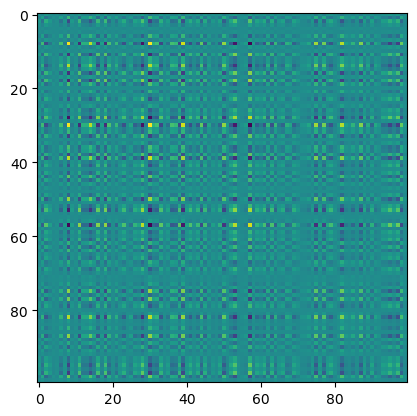

In [ ]:
# show qk matrix
plt.imshow(qk.cpu().detach().numpy())

In [ ]:
california_without_income_tensor_processed

tensor([[[-71.9142,  63.4323,   0.0000,  ...,   0.0000,   0.0000,   0.0000]],

        [[-40.4900,  40.3652,   0.0000,  ...,   0.0000,   0.0000,   0.0000]],

        [[ 70.4331, -56.6675,   0.0000,  ...,   0.0000,   0.0000,   0.0000]],

        ...,

        [[-44.7111,  32.0910,   0.0000,  ...,   0.0000,   0.0000,   0.0000]],

        [[ 55.4244, -56.1661,   0.0000,  ...,   0.0000,   0.0000,   0.0000]],

        [[ 55.8935, -59.9271,   0.0000,  ...,   0.0000,   0.0000,   0.0000]]],
       device='cuda:0')